In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import scipy
import time
import itertools
from NEF_RL import *
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

In [27]:
rl = pd.read_pickle("data/RL_n_carrabin_1_dynamics.pkl")
nef200 = pd.read_pickle("data/NEF_RL_carrabin_1_dynamics_200neurons.pkl")
nef300 = pd.read_pickle("data/NEF_RL_carrabin_1_dynamics_300neurons.pkl")
nef500 = pd.read_pickle("data/NEF_RL_carrabin_1_dynamics_500neurons.pkl")
human = pd.read_pickle("data/carrabin.pkl").query("sid==1")

/tmp/ipykernel_238779/2466360668.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(human.query("qid==@qid"), x='response', ax=axes[q], color=palette[0], label='human')
/tmp/ipykernel_238779/2466360668.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(rl.query("qid==@qid"), x='response', ax=axes[q], color=palette[1], label='rl_n')
/tmp/ipykernel_238779/2466360668.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(nef.query("qid==@qid"), x='response', ax=axes[q], color=palette[2], label='nef')
/tmp/ipykernel_238779/2466360668.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[q].legend()
/tmp/ipykernel_23

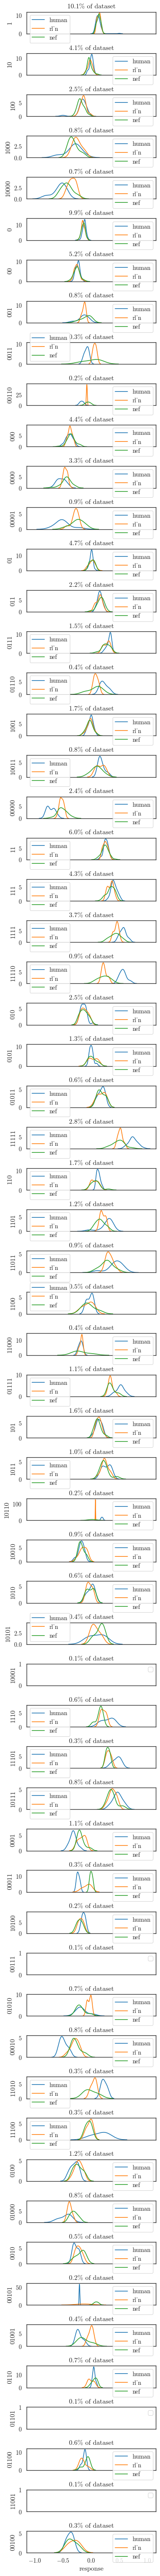

In [34]:
qids = human['qid'].unique()
n_total = human['qid'].size
fig, axes = plt.subplots(nrows=len(qids), ncols=1, figsize=(4, 1*len(qids)), sharex=True)
for q, qid in enumerate(qids):
    sns.kdeplot(human.query("qid==@qid"), x='response', ax=axes[q], color=palette[0], label='human')
    sns.kdeplot(rl.query("qid==@qid"), x='response', ax=axes[q], color=palette[1], label='rl_n')
    sns.kdeplot(nef.query("qid==@qid"), x='response', ax=axes[q], color=palette[2], label='nef')
    n_qid = human.query("qid==@qid")['qid'].size
    axes[q].set(ylabel=qid, title=f"{100*n_qid/n_total:.4}% of dataset")
    axes[q].legend()
plt.tight_layout()
fig.savefig("plots/response_distribution_sid1_all_sequences.jpg", dpi=600)

In [29]:
nef200['neurons'] = 200
nef300['neurons'] = 300
nef500['neurons'] = 500
combined = pd.concat([human, rl, nef200, nef300, nef500], ignore_index=True)
combined['excursion'] = None
for i, row in combined.iterrows():
    mt = row['type']
    sid = row['sid']
    qid = row['qid']
    response = row['response']
    avg_response = combined.query("type==@mt & sid==@sid & qid==@qid")['response'].mean()
    combined.at[i, 'excursion'] = response - avg_response
    if mt=="NEF_RL":
        neurons = row['neurons']
        combined.at[i, 'type'] = f"NEF_RL ({neurons})"

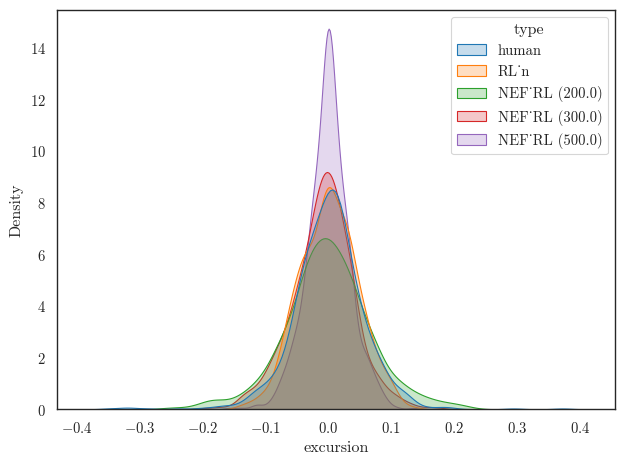

In [32]:
fig, ax = plt.subplots()
sns.kdeplot(combined, x='excursion', hue='type', ax=ax, palette=palette[:5], fill=True, common_norm=False)
plt.tight_layout()
fig.savefig("plots/excursion_distribution_sid1.jpg", dpi=600)